# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [11]:
# Create a Beautiful Soup Object
html = browser.html
temperature = BeautifulSoup(html, 'html.parser')



In [13]:
# Extract all rows of data
row_data = temperature.find('table')
row_data

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [16]:
# Create an empty list

rows = []

# Loop through the scraped data to create a list of rows
scrapped_rows =row_data.find_all('tr', class_='data-row')

for row in scrapped_rows:
    rows.append([element.text.strip() for element in row.find_all('td')])
rows


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [24]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
cols =  [col.text for col in row_data.find_all('th')]
df = pd.DataFrame(rows, columns = cols)

In [26]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [34]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [40]:
# Change data types for data analysis
df[['id', 'sol', 'ls', 'month']] = df[['id', 'sol', 'ls', 'month']].astype(int)
df[['min_temp', 'pressure']] = df[['min_temp', 'pressure']].astype(float)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])


In [42]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [49]:
# 1. How many months are there on Mars?
len(df['month'].unique())

12

In [51]:
# 2. How many sols (Martian days) worth of data are there?
df['sol'].count()

1867

In [53]:
# 3. What is the average minimum temperature by month?
avg_min_temp=df[['month', 'min_temp']].groupby('month').mean()
avg_min_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


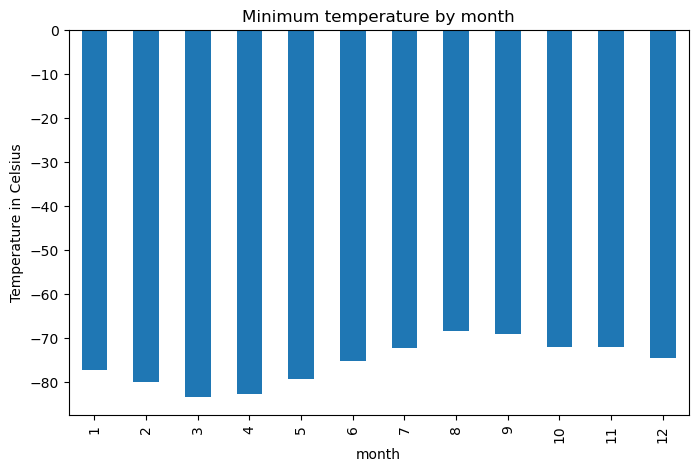

In [63]:
# Plot the average minimum temperature by month
avg_min_temp_plot = avg_min_temp.plot(kind='bar', figsize=(8,5), legend=False)
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.title("Minimum temperature by month")
plt.show()

In [79]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_temperature = avg_min_temp['min_temp'].min()
coldest_month= avg_min_temp[avg_min_temp['min_temp'] == coldest_temperature].reset_index()['month'][0]

# hottest month and its temperature
hottest_temperature= avg_min_temp['min_temp'].max()
hottest_month = avg_min_temp[avg_min_temp['min_temp'] == hottest_temperature].reset_index()['month'][0]

print(f"Coldest Month: {coldest_month}, Average Temperature: {round((coldest_temperature),2)}C")
print(f"Hottest Month: {hottest_month}, Average Temperature: {round((hottest_temperature),2)}C")

Coldest Month: 3, Average Temperature: -83.31C
Hottest Month: 8, Average Temperature: -68.38C


In [57]:
# 4. What is the average pressure by month?
avg_pressure = df[['month', 'pressure']].groupby('month').mean()
avg_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


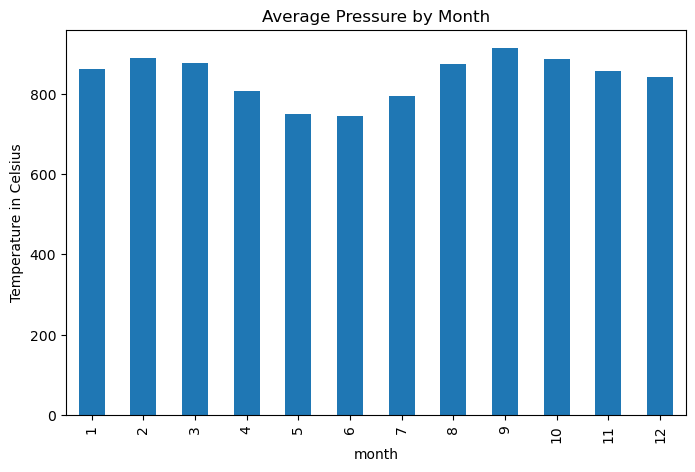

In [59]:
# Plot the average pressure by month
avg_pressure_plot = avg_pressure.plot(kind='bar', figsize=(8,5), legend=False)
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")
plt.title("Average Pressure by Month")
plt.show()

In [99]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure = avg_pressure['pressure'].min()
lowest_pressure_month = avg_pressure[avg_pressure['pressure'] == lowest_pressure].reset_index()['month'][0]

# hottest month and its temperature
highest_pressure = avg_pressure['pressure'].max()
highest_pressure_month = avg_pressure[avg_pressure['pressure']== highest_pressure ].reset_index()['month'][0]


print(f"lowest pressure Month is: {lowest_pressure_month},Pressure of: {round((lowest_pressure),2)}")
print(f"highest pressure Month is: {highest_pressure_month},Pressure of: {round((highest_pressure),2)}")

lowest pressure Month is: 6,Pressure of: 745.05
highest pressure Month is: 9,Pressure of: 913.31


<function matplotlib.pyplot.show(close=None, block=None)>

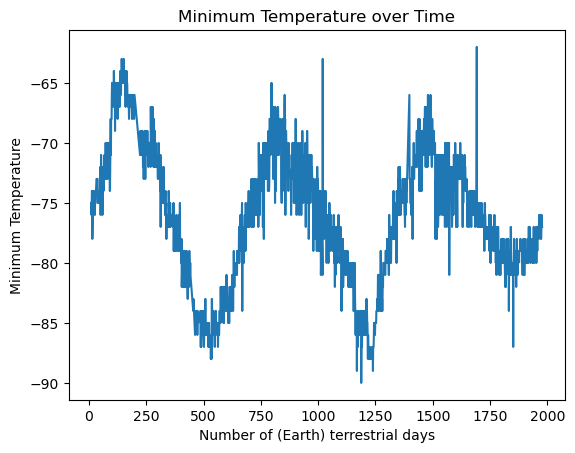

In [95]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
days_in_martian_year=plt.plot(df['sol'], df['min_temp'])


plt.xlabel("Number of (Earth) terrestrial days")
plt.ylabel("Minimum Temperature")
plt.title("Minimum Temperature over Time")
plt.show

#### Minimum Temperature

YOUR ANALYSIS HERE
YOUR ANALYSIS HERE
Coldest Month: 3, Average Temperature: -83.31C
Hottest Month: 8, Average Temperature: -68.38C
from the this analysis month 3 has the coldest month on Mars with 83.31c and month 8 has the warmest. By earths standard that will be March and August respectively 

#### Atmospheric Pressure

lowest pressure Month is: 6,Pressure of: 745.05
highest pressure Month is: 9,Pressure of: 913.31
Selection deleteFrom the Analysis month 6 has the lowest pressure on 745 and 913 in month 9  which  is around the hottest  time of the year in Mars which we can analyse be during this time the air is descending and asceding on month 6 making it close to cooler thend
C

#### Year Length

YOUR ANALYSIS HERE
base onhttps://www.rmg.co.uk/stories/topics/how-long-day-on-mars. Mars has close to similars days as Earth with a sighly difference of 39mins and 35 second so  as we experience 23.5 degrees tilt mars has 20 degrees. There are 687 Earht days to one martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv('outputs/mars_weather.csv')

In [22]:
browser.quit()